In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
destinations_df = pd.read_csv('destinations.csv')

In [3]:
train_df = train_df.sample(100000)

In [4]:
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
23025678,2014-12-09 21:45:37,2,3,66,174,9351,406.9034,732782,0,0,...,1,1,8250,1,0,5,2,50,628,54
27330995,2013-10-19 12:39:35,37,1,69,758,1361,NaN,793924,0,0,...,0,1,11461,1,0,1,3,82,821,27
34509684,2014-09-07 21:30:48,11,3,205,354,25315,1116.6369,337522,0,1,...,0,1,11335,1,0,2,4,136,196,26
32989086,2014-04-02 23:22:31,24,2,3,50,5703,NaN,240453,0,1,...,1,1,12217,6,0,1,2,50,365,72
25795351,2014-12-04 05:54:31,2,3,12,831,46163,NaN,1059118,0,0,...,0,1,18569,1,0,1,3,182,83,26


In [5]:
test_df.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [6]:
destinations_df.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [7]:
train_df.corr().head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,1.000000,-0.636733,0.165219,0.133262,-0.011970,0.031662,0.020687,-0.003768,0.053904,-0.030035,...,-0.028951,0.013894,0.023948,-0.012103,-0.014159,0.020311,0.203120,0.260798,-0.071047,-0.022732
posa_continent,-0.636733,1.000000,0.176408,-0.033185,0.037974,0.048600,-0.007450,0.011611,-0.098409,0.091550,...,0.028954,-0.028668,-0.012541,0.045669,0.009370,-0.011681,-0.328129,-0.155048,0.053232,0.010979
user_location_country,0.165219,0.176408,1.000000,0.050244,0.120488,0.050746,-0.018471,0.004918,-0.029910,0.106689,...,0.036305,-0.004531,0.007826,0.028020,0.005719,0.006608,-0.062141,0.100535,0.020467,-0.007547
user_location_region,0.133262,-0.033185,0.050244,1.000000,0.132575,0.134408,-0.004117,0.017386,0.039659,0.001265,...,0.013821,0.003807,0.015030,0.003487,0.005348,-0.006976,0.047015,-0.054121,0.041415,0.005586
user_location_city,-0.011970,0.037974,0.120488,0.132575,1.000000,0.012495,-0.009797,0.000092,0.014386,0.023249,...,0.015321,0.001828,0.001202,-0.001237,-0.000669,0.002814,-0.001249,-0.013548,0.010086,-0.000586


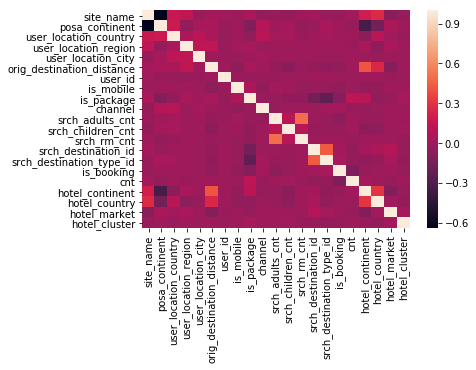

In [8]:
sns.heatmap(train_df.corr())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


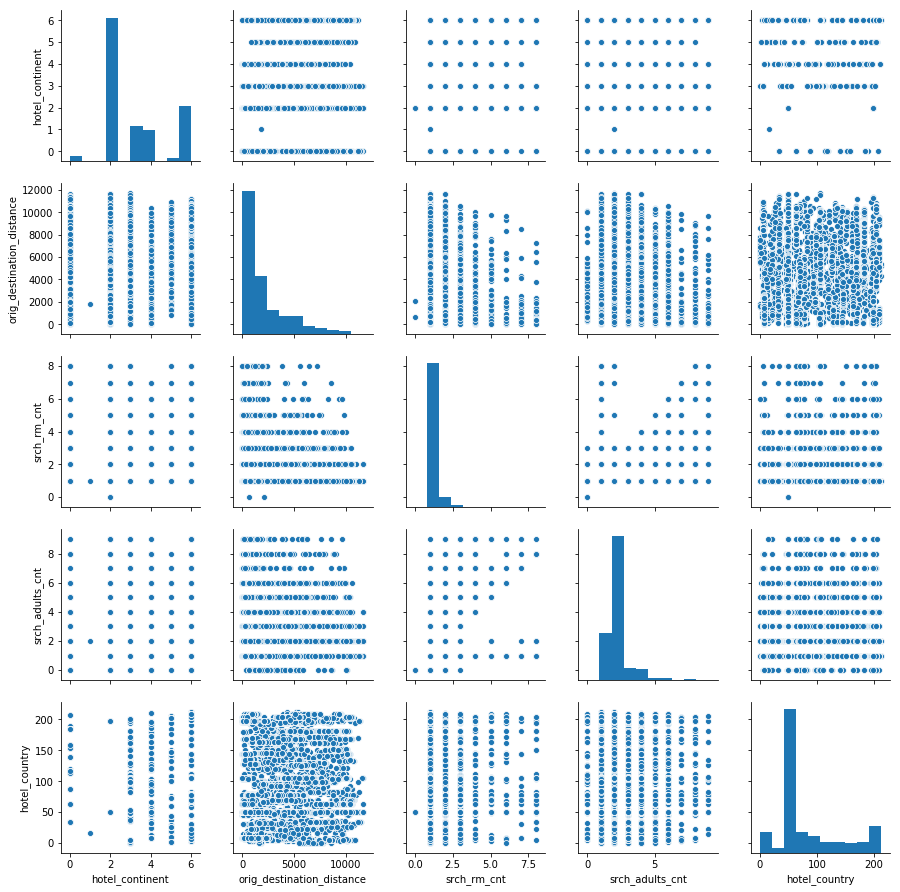

In [9]:
sns.pairplot(train_df[['hotel_continent', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'hotel_country']], palette='Set1')


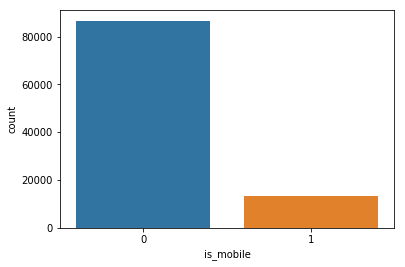

In [10]:
sns.countplot(train_df['is_mobile'])

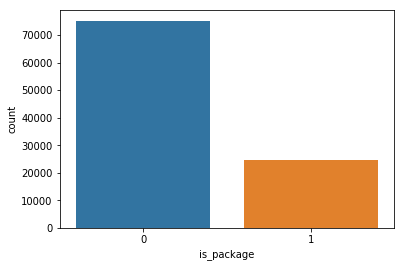

In [11]:
sns.countplot(train_df['is_package'])

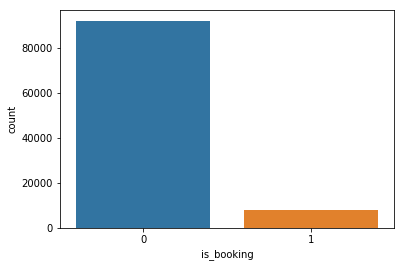

In [12]:
sns.countplot(train_df['is_booking'])

In [13]:
print('{}% of booking rate'.format(train_df['is_booking'].mean()*100))

8.012% of booking rate


## Compare mobile bookings

Text(0, 0.5, 'mobile bookings')

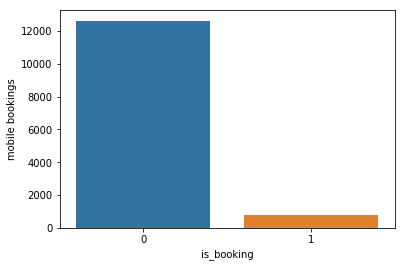

In [14]:
sns.countplot(train_df[(train_df['is_mobile']) == 1]['is_booking'])
plt.ylabel('mobile bookings')

Text(0, 0.5, 'mobile bookings')

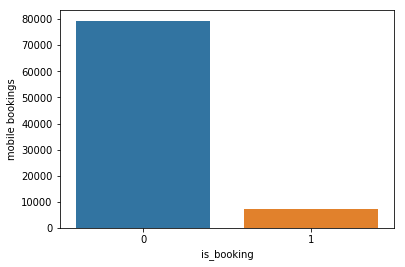

In [15]:
sns.countplot(train_df[(train_df['is_mobile']) == 0]['is_booking'])
plt.ylabel('mobile bookings')

#### Apparently, there are more bookings without mobile devices

In [16]:
booking_by_continent = train_df[['hotel_continent', 'is_booking']].groupby('hotel_continent').mean()
booking_by_continent

,is_booking
hotel_continent,
0,0.063587
1,0.000000
2,0.091355
3,0.067631
4,0.045553
5,0.073770
6,0.080404


## Compare bookings by continent

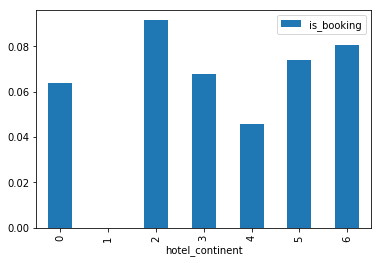

In [17]:
booking_by_continent.plot.bar()

#### We assume that continent number 2 is america

## Check how many users are connected from mobile devices in each country

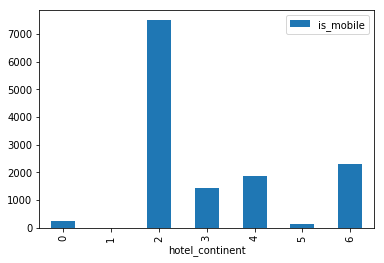

In [18]:
mobile_by_continent = train_df[['hotel_continent', 'is_mobile']].groupby('hotel_continent').sum()
mobile_by_continent.plot.bar()

## Check what's the number of rooms in a search that end in a booking

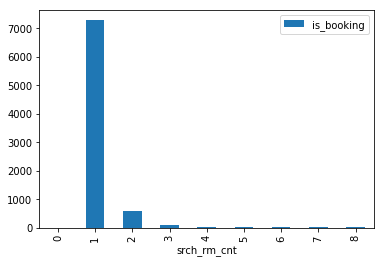

In [19]:
mobile_by_continent = train_df[['is_booking', 'srch_rm_cnt']].groupby('srch_rm_cnt').sum()
mobile_by_continent.plot.bar()

## Let's graph some histograms of the number of adults, children and rooms to look for outliers

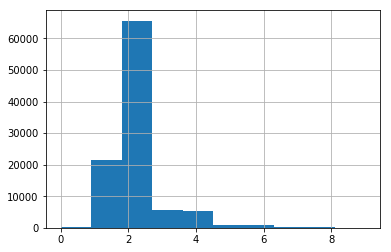

In [20]:
train_df['srch_adults_cnt'].hist()

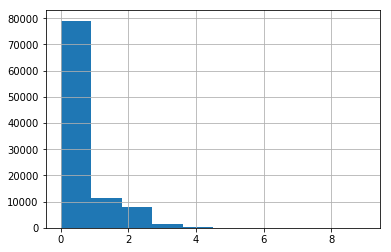

In [21]:
train_df['srch_children_cnt'].hist()

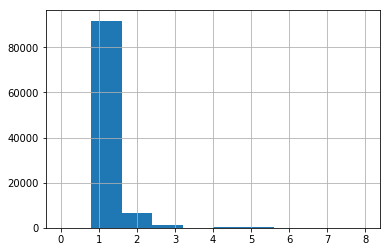

In [22]:
train_df['srch_rm_cnt'].hist()

In [23]:
len(train_df[train_df['srch_adults_cnt'] < 2])

21546

In [24]:
len(train_df[train_df['srch_adults_cnt'] > 7])

274

In [25]:
len(train_df[train_df['srch_children_cnt'] < 2])

90251

In [26]:
len(train_df[train_df['srch_adults_cnt'] > 7])

274

In [27]:
len(train_df[train_df['srch_rm_cnt'] < 2])

91788

In [28]:
len(train_df[train_df['srch_rm_cnt'] > 7])

92

#### There are many values over 7 and below 2, therefore, they are not outliers

In [29]:
train_df['date_time'] = train_df['date_time'].apply(lambda y: datetime.strptime(y, "%Y-%m-%d %H:%M:%S").timestamp() if type(y) is str else y)
train_df['srch_ci'] = train_df['srch_ci'].apply(lambda y: datetime.strptime(y, "%Y-%m-%d").timestamp() if type(y) is str else y)
train_df['srch_co'] = train_df['srch_co'].apply(lambda y: datetime.strptime(y, "%Y-%m-%d").timestamp() if type(y) is str else y)


In [46]:
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
23025678,1.418183e+09,2,3,66,174,9351,406.9034,732782,0,0,...,1,1,8250,1,0,5,2,50,628,54
27330995,1.382204e+09,37,1,69,758,1361,NaN,793924,0,0,...,0,1,11461,1,0,1,3,82,821,27
34509684,1.410143e+09,11,3,205,354,25315,1116.6369,337522,0,1,...,0,1,11335,1,0,2,4,136,196,26
32989086,1.396503e+09,24,2,3,50,5703,NaN,240453,0,1,...,1,1,12217,6,0,1,2,50,365,72
25795351,1.417694e+09,2,3,12,831,46163,NaN,1059118,0,0,...,0,1,18569,1,0,1,3,182,83,26


In [4]:
df = train_df[['srch_destination_id', 'hotel_country', 'hotel_market', 'hotel_cluster']]
df.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster
13657639,20998,204,1762,58
35329960,8788,77,2,95
26595112,8220,182,46,57
12840967,44045,50,701,5
10503701,8791,8,110,65


# Decision Tree ML

### Test train split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
prepared_data = df.fillna(df.mean())

In [7]:
X = prepared_data.drop('hotel_cluster', axis=1)
y = prepared_data['hotel_cluster']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Creating the decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction

In [12]:
predictions = dtree.predict(X_test)

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.15      0.49      0.23     20185
           1       0.26      0.98      0.41     24116
           2       0.13      0.20      0.16     23155
           3       0.32      0.06      0.11     11893
           4       0.17      0.13      0.15     18510
           5       0.13      0.12      0.12     33191
           6       0.17      0.09      0.12     20271
           7       0.28      0.11      0.16     13421
           8       0.30      0.26      0.28     17668
           9       0.11      0.15      0.13     25988
          10       0.20      0.05      0.07     21404
          11       0.12      0.10      0.11     18722
          12       0.21      0.06      0.10     13874
          13       0.18      0.09      0.12     17810
          14       0.32      0.04      0.06     10117
          15       0.18      0.09      0.12     16954
          16       0.17      0.08      0.11     25238
          17       0.19    

In [14]:
print(confusion_matrix(y_test,predictions))

[[19630   293     0 ...     0     0     0]
 [    0 47317     0 ...     0     0     0]
 [    1     0  9277 ...  1677   579   609]
 ...
 [ 1477     0  1289 ...  5673  2679   322]
 [ 1350     0   992 ...  4285 14826   100]
 [  221    96  1582 ...   485  1007  5156]]
